In [1]:

from importlib import reload
import synapse_selector.utils.failure_rate
reload(synapse_selector.utils.failure_rate)
from synapse_selector.utils.failure_rate import failure_rate
import pandas as pd

In [2]:
pd.DataFrame({'No. responses first pulse': [5],
             'total detected synapses': [10],
             'fraction responding': [5/10],
             'stimulation frame': [30],
             'patience for response': [10]})

ValueError: If using all scalar values, you must pass an index

In [4]:
peak_df = pd.read_excel('/Users/stephanweissbach/Desktop/keep_folder/test_data.txt/test_data_responses.xlsx')

In [6]:
stimulations = [30,40,50,60,70]

In [19]:
failure_rate(peak_df,stimulations,10)

ROI#1_N/A 30 response
1
ROI#1_N/A 40 no response
1
ROI#1_N/A 50 response
2
ROI#1_N/A 60 response
3
ROI#1_N/A 70 response
4
rate = 4 / 5
ROI#2_N/A 30 response
1
ROI#2_N/A 40 no response
1
ROI#2_N/A 50 response
2
ROI#2_N/A 60 response
3
ROI#2_N/A 70 response
4
rate = 4 / 5
ROI#3_N/A 30 response
1
ROI#3_N/A 40 response
2
ROI#3_N/A 50 response
3
ROI#3_N/A 60 no response
3
ROI#3_N/A 70 response
4
rate = 4 / 5
ROI#4_N/A 30 response
1
ROI#4_N/A 40 response
2
ROI#4_N/A 50 response
3
ROI#4_N/A 60 no response
3
ROI#4_N/A 70 response
4
rate = 4 / 5
ROI#7_N/A 30 response
1
ROI#7_N/A 40 response
2
ROI#7_N/A 50 response
3
ROI#7_N/A 60 response
4
ROI#7_N/A 70 no response
4
rate = 4 / 5


,ROI,response rate
0,ROI#1_N/A,0.8
1,ROI#2_N/A,0.8
2,ROI#3_N/A,0.8
3,ROI#4_N/A,0.8
4,ROI#7_N/A,0.8


In [5]:
peak_df

,Filename,ROI#,Frame,abs. Amplitude,rel. Amplitude,decay constant (tau),inv. decay constant (invtau)
0,test_data.txt,ROI#1_N/A,32,2.029,1.513,0.031269,31.980476
1,test_data.txt,ROI#1_N/A,52,2.022,1.409,0.558025,1.792034
2,test_data.txt,ROI#1_N/A,70,2.279,1.730,1.693570,0.590469
3,test_data.txt,ROI#2_N/A,32,1.806,1.217,0.042142,23.729026
4,test_data.txt,ROI#2_N/A,52,2.122,1.449,0.032331,30.930055
5,test_data.txt,ROI#2_N/A,63,1.923,1.066,0.043734,22.865653
6,test_data.txt,ROI#2_N/A,71,2.037,1.102,6.350448,0.157469
7,test_data.txt,ROI#2_N/A,79,1.804,0.821,0.032659,30.619386
8,test_data.txt,ROI#3_N/A,32,3.860,3.082,0.726993,1.375529
9,test_data.txt,ROI#3_N/A,42,2.081,1.231,0.519597,1.924569


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from silx.io.dictdump import dicttoh5, h5todict
import numpy as np

import torch
import torch.nn as nn
import pytorch_lightning as pl
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
#from sklearn.model_selection import train_test_split
if torch.cuda.is_available():
    print('GPU ready')
else:
    print('Warning: only CPU found')

In [5]:
def parse_h5_file(path: str) -> tuple[dict,int]:
    traces = h5todict(path)
    peak_position = int(traces['peak_frame'])
    return traces, peak_position

def random_trace(traces: dict) -> list[float]:
    # choose random pot
    pot_keys = [*traces.keys()]
    pot_keys.remove('peak_frame')
    # choose random trace from random pot
    pot_key = np.random.choice(pot_keys)
    trace_key = np.random.choice([*traces[pot_key].keys()])
    return traces[pot_key][trace_key]

def scale_array(arr, min_val, max_val):
    min_arr, max_arr = np.min(arr), np.max(arr)
    scaled_arr = (arr - min_arr) / (max_arr - min_arr) * (max_val - min_val) + min_val
    return scaled_arr

def add_trace(traces: dict,
              trace: np.ndarray,
              # position of the peak inside the whole trace
              position: int,
              # position of the peak inside the peak trace
              peak_position: int,
              intensity_peaks: list[float]) -> np.ndarray:
    # pick a random trace from dict
    selected_trace = random_trace(traces)
    # draw a random scale factor for the trace peak and scale it
    scale_factor = np.random.uniform(intensity_peaks[0], intensity_peaks[1])
    scaled_trace = scale_array(selected_trace, np.random.uniform(-0.05,0.05), scale_factor)
    frames_after = len(scaled_trace) - (peak_position+1)
    # if the actual peak timepoint of the peak trace would be outside the boundaries
    # e.g. position = 2 & peak_position = 7
    if position - peak_position < 0:
        # trim left side
        frames_to_trim = peak_position - position
        scaled_trace = scaled_trace[frames_to_trim:]
        pad_right = len(trace) - len(scaled_trace)
        scaled_trace = np.pad(scaled_trace, (0, pad_right), constant_values=(0, 0))
        return np.add(trace, scaled_trace)
    # if the actual peak timepoint would be outside the boundaries
    elif position + frames_after >= len(trace):
        # trim right side
        frames_to_trim = (len(trace) - position) + peak_position
        scaled_trace = scaled_trace[:frames_to_trim]
        pad_left = len(trace) - len(scaled_trace)
        scaled_trace = np.pad(scaled_trace, (pad_left, 0), constant_values=(0, 0))
        return np.add(trace,scaled_trace)
    # no trimming
    pad_left = position - peak_position
    pad_right = len(trace) - (position + frames_after) - 1
    scaled_trace = np.pad(scaled_trace, (pad_left, pad_right), constant_values=(0, 0))
    return np.add(trace,scaled_trace)

def validate_peak_positions(trace: np.ndarray,
                            peaks: list[int]) -> list[int]:
    '''
    Adding multiple peaks in close proximity might result in shifted peak positions. 
    This function checks whether the peak is offset by 1 and corrects for this.
    '''
    validated_peaks = []
    for peak in peaks:
        lower_border = max(0,peak-1)
        upper_border = min(len(trace),peak+2)
        validated_peaks.append(np.argmax(trace[lower_border:upper_border])+lower_border)
    return validated_peaks

def add_noise(trace: np.ndarray,
              peaks: list[int],
              std_noise: float) -> np.ndarray:
    noise_template = np.random.normal(0, std_noise, len(trace))
    trace_with_noise = np.add(trace, noise_template)
    for peak_pos in peaks:
        if peak_pos == 0:
            if trace_with_noise[peak_pos] < trace_with_noise[peak_pos + 1]:
                noise_template[peak_pos] = 0
                noise_template[peak_pos +1 ] = 0
        elif peak_pos + 1 == len(trace):
            if trace_with_noise[peak_pos] < trace_with_noise[peak_pos - 1]:
                noise_template[peak_pos] = 0
                noise_template[peak_pos - 1] = 0
        elif (trace_with_noise[peak_pos] < trace_with_noise[peak_pos + 1]) or (trace_with_noise[peak_pos] < trace_with_noise[peak_pos - 1]):
            noise_template[peak_pos - 1] = 0
            noise_template[peak_pos] = 0
            noise_template[peak_pos + 1] = 0
        else:
            continue
        trace_with_noise = np.add(trace, noise_template)
    return trace_with_noise
            

def simulate_trace(traces: dict,
                   trace_length: int,
                   std_noise: float,
                   min_dist_peaks: int,
                   template_peak_timepoint: int,
                   max_peaks: int = 10,
                   intensity_peaks: list[float] = [1.2,15]) -> tuple[np.ndarray,list[int]]:
    max_peaks_possible = trace_length // (min_dist_peaks+1)
    if max_peaks >= max_peaks_possible:
        raise ValueError(f'At most {max_peaks_possible} for trace length {trace_length}. You selected {max_peaks}.')
    # buffer for simulated trace
    trace = np.zeros(trace_length)
    # get peak parameters
    num_peaks = np.random.randint(0,max_peaks)
    peak_positions = []
    possible_peak_positions = np.arange(trace_length)
    
    for _ in range(num_peaks):
        if len(possible_peak_positions) == 0:
            print(f'Restarted trace simulation because no possible peak position was left. If this happend more often, consider using a lower number of max_peaks (currently: {max_peaks}) or a longer simulation length (currently: {trace_length}).')
            return simulate_trace(traces, trace_length, std_noise, min_dist_peaks, template_peak_timepoint, max_peaks, intensity_peaks)
        # choose a random position for the peak
        peak_positions.append(np.random.choice(possible_peak_positions))
        # remove surrounding entries from possible peak positions
        idx_peak_position = np.where(possible_peak_positions == peak_positions[-1])[0][0]
        idx_start = max(0, idx_peak_position - min_dist_peaks)
        idx_end = min(trace_length, idx_peak_position + min_dist_peaks)
        possible_peak_positions = np.concatenate((possible_peak_positions[:idx_start], possible_peak_positions[idx_end + 1:]))
        # add a peak trace to that specific peak position
        trace = add_trace(traces, trace, peak_positions[-1], template_peak_timepoint, intensity_peaks)
    # increase baseline to 1
    trace = np.add(trace,np.ones(trace_length))
    # validate peak positions
    peak_positions = validate_peak_positions(trace, peak_positions)
    return add_noise(trace, peak_positions, std_noise), peak_positions
    

In [6]:
traces, peak_position = parse_h5_file("/Users/stephanweissbach/Desktop/traces.h5")

In [8]:
def sliding_window(data, window_size, overlap_percent):
    stride = int(window_size * (1 - overlap_percent))

    windows = []
    for i in range(0, len(data) - window_size + 1, stride):
        window = data[i:i+window_size]
        windows.append(window)
    return torch.stack(windows)

In [9]:
num_samples = 1000
input_length = 10_000
window_length = 50
windows_per_sample = input_length // window_length
std_center = 0.09
std_scale = 0.0125
max_peaks = 1000

data = torch.zeros((num_samples * windows_per_sample, 1, window_length), dtype=torch.float32)
labels = torch.zeros((num_samples * windows_per_sample), window_length, dtype=torch.float32)

for idx in range(num_samples):
    offset = idx * windows_per_sample
    std = abs(np.random.normal(std_center, std_scale))
    trace, peak_positions = simulate_trace(traces, input_length, std, 2, peak_position, max_peaks, [0.4, 3])
    trace_tensor = torch.tensor(trace)
    traces_sliding = sliding_window(trace_tensor, window_length, 0)

    labels_trace = torch.zeros(input_length)

    # create labels
    for peak in peak_positions:
        labels_trace[peak] = 1

    labels_sliding = sliding_window(labels_trace, window_length, 0)
    
    for trace_idx, trace_sliding in enumerate(traces_sliding): 
        data[offset + trace_idx] = trace_sliding
    
    for label_idx, label_sliding in enumerate(labels_sliding): 
        labels[offset + label_idx] = label_sliding

In [11]:
import torch.nn.functional as F

class PeakDetectionModel_convout(pl.LightningModule):
    def __init__(self):
        super(PeakDetectionModel_convout, self).__init__()

        # 1D Convolution layers
        self.conv1 = nn.Conv1d(1, 32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, stride=1, padding=2)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1)

        # Batch normalization layers
        self.batch_norm1 = nn.BatchNorm1d(32)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.batch_norm3 = nn.BatchNorm1d(128)

        # Max pooling layers
        self.pool = nn.MaxPool1d(kernel_size=1, stride=1)

        # Output convolutional layer with 1 channel
        self.output_conv = nn.Conv1d(128, 1, kernel_size=1, stride=1)

    def forward(self, x):
        # Input shape: (batch_size, 1, sequence_length)

        # Convolutional layers with batch normalization and relu activation
        x = F.relu(self.batch_norm1(self.conv1(x)))
        x = self.pool(x)
        x = F.relu(self.batch_norm2(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.batch_norm3(self.conv3(x)))
        x = self.pool(x)

        # Apply output convolutional layer with 1 channel
        x = self.output_conv(x)

        # Apply sigmoid activation for peak detection
        x = torch.sigmoid(x)

        return x[:, -1, :]  # Squeeze the channel dimension for a 1D output

    def training_step(self, batch, batch_idx):
        data, targets = batch
        outputs = self(data)
        loss = F.binary_cross_entropy(outputs, targets)
        self.log('train_loss', loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        data, targets = batch
        outputs = self(data)
        loss = F.binary_cross_entropy(outputs, targets)
        self.log("val_loss", loss, on_step=False, on_epoch=True, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)


In [12]:
model = torch.load('/Users/stephanweissbach/Desktop/synapse_selector_detect/models/anomaly_50_conv-out.pth')


In [35]:
model(torch.tensor(np.random.normal(1,0.1,50).reshape(1,1,50), dtype=torch.float32))

tensor([[3.4450e-29, 6.2983e-33, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0864e-05,
         3.0780e-23, 2.8495e-18, 9.4309e-15, 7.0270e-01, 4.6242e-16, 4.8685e-02,
         2.8877e-20, 2.0553e-03, 8.1189e-22, 3.6467e-07, 2.5226e-14, 2.9417e-21,
         1.1385e-09, 1.9304e-18, 3.4074e-22, 2.4512e-26, 2.2813e-20, 2.9180e-24,
         5.5419e-39, 6.9577e-22, 1.4645e-32, 3.0056e-16, 6.9029e-04, 7.8660e-15,
         3.4500e-02, 8.1187e-14, 2.3278e-03, 1.2656e-07, 6.1592e-07, 4.5647e-04,
         6.0538e-19, 4.0915e-02, 9.9359e-19, 3.2420e-03, 1.2882e-11, 5.8673e-14,
         8.4777e-14, 4.5345e-13, 1.4777e-14, 2.1700e-07, 2.9869e-29, 1.0233e-07,
         2.3726e-30, 2.7590e-37]], grad_fn=<SliceBackward0>)

In [53]:
np.random.normal(1,0.1,100).reshape(1,2,50)

array([[[1.06667678, 0.86607034, 1.14426476, 1.08761886, 1.14634588,
         1.05775392, 0.96011937, 1.03359403, 1.04428751, 0.9696472 ,
         0.8954776 , 0.93575134, 1.02409169, 1.06074128, 1.11577013,
         0.89089217, 1.12813732, 0.86438464, 1.04417349, 1.00805325,
         1.00147911, 1.16885283, 1.02946594, 1.08630598, 0.95351222,
         0.96267226, 0.81004892, 0.82963533, 1.1227682 , 0.92476542,
         1.13230874, 1.04824819, 1.06777955, 1.027067  , 0.94430663,
         1.14882048, 0.9747402 , 1.11357912, 0.91162303, 1.02676195,
         0.95496972, 0.97467514, 1.14148648, 1.14239709, 1.13836778,
         0.93890726, 0.95779653, 1.01644276, 0.85550992, 0.93561949],
        [1.07836255, 0.81927749, 0.85979469, 1.09242353, 0.99368289,
         1.05617237, 0.94658965, 1.07657705, 0.90036252, 1.06525468,
         0.88084098, 1.19787945, 0.99471924, 0.82536704, 0.89862624,
         0.94593819, 1.01738593, 1.05460007, 0.73601831, 0.96731117,
         1.00447793, 1.08071929, 

In [59]:
type(tt)

torch.Tensor

In [51]:
tt

tensor([[[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
           11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
           22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
           33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
           44.,  45.,  46.,  47.,  48.,  49.],
         [ 50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
           61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
           72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
           83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
           94.,  95.,  96.,  97.,  98.,  99.],
         [100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
          111., 112., 113., 114., 115., 116., 117., 118., 119.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 

In [56]:
t = np.arange(50*64-3)
to_pad = 50 - (len(t) % 50)
tt = np.pad(t,(0,to_pad),mode='constant')
second_dim = len(tt) // 50
tt = tt.reshape(second_dim,1,50)
print(tt)

[[[   0    1    2 ...   47   48   49]]

 [[  50   51   52 ...   97   98   99]]

 [[ 100  101  102 ...  147  148  149]]

 ...

 [[3050 3051 3052 ... 3097 3098 3099]]

 [[3100 3101 3102 ... 3147 3148 3149]]

 [[3150 3151 3152 ...    0    0    0]]]


In [58]:
t = np.arange(50*64-3)
to_pad = 50 - (len(t) % 50)
tt = np.pad(t,(0,to_pad),mode='constant')
second_dim = len(tt) // 50
tt = torch.tensor(tt.reshape(second_dim,1,50), dtype=torch.float32)


In [29]:
start = 0
stop = 10000
X_test = data[start:stop]
y_test = labels[start:stop].flatten()
preds = model(X_test)

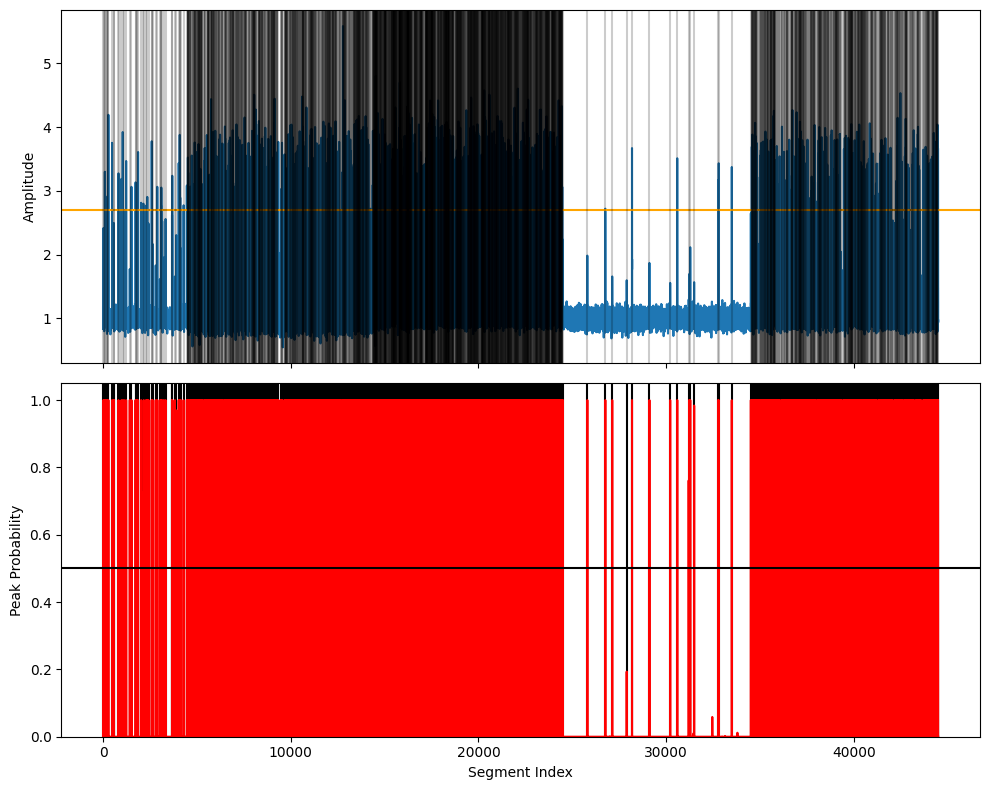

In [25]:


# normal threshold method
median_ = np.median(X_test.flatten())
std_ = np.std(np.array(X_test.flatten()))
threshold = median_ + 3*std_

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot the main time series on the upper subplot
ax1.plot(X_test.flatten())
ax1.set_ylabel('Amplitude')
ax1.axhline(threshold,color='orange',ls='-')

for true_pos,i in enumerate(y_test):
    if i == 0: continue
    ax2.axvline(true_pos, color='black')
    ax1.axvline(true_pos,color='black',alpha=0.2)
# Plot the classified labels on the lower subplot
ax2.plot(preds.flatten().detach(), color='r')
ax2.set_xlabel('Segment Index')
ax2.set_ylabel('Peak Probability')
ax2.set_ylim(0, 1.05)
ax2.axhline(0.5,color='black')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()